# Initialization, Activations and Gradients

In [2]:
import warnings
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

warnings.simplefilter(action="ignore")

/home/david/miniconda3/envs/kaggle/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Questions

- ¿Why in the past it was so difficult to train deep neural networks?
- ¿Why does making all the outputs follow the same distribution improve convergence speed?
- ¿How does the analysis change when using ReLU instead of a squashing function like tanh?
- ¿How are the convolution layers initialized by default and how is that different from the Kaimmin initialization?
- ¿What to look for when monitoring gradients and activations in a dnn?


**Saturation of activation functions**

Saturation of the activations causes the (local) gradients to be very small or even 0, 
which in turn means that the updates of the weights would be smaller or even don't update at all. 
This is known as gradient vanishing.

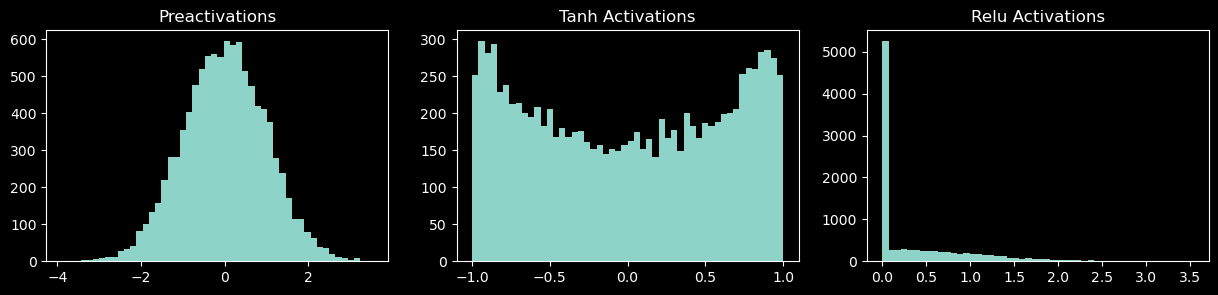

In [6]:
# activations of tanh and relu on a normally distributed data 
x = torch.randn(10000) 
act_tanh = torch.tanh(x)
act_relu = torch.relu(x)
_, axs = plt.subplots(1, 3, figsize=(15, 3))

axs[0].hist(x, 50)
axs[1].hist(act_tanh, 50)
axs[2].hist(act_relu, 50);
axs[0].set_title("Preactivations")
axs[1].set_title("Tanh Activations")
axs[2].set_title("Relu Activations");

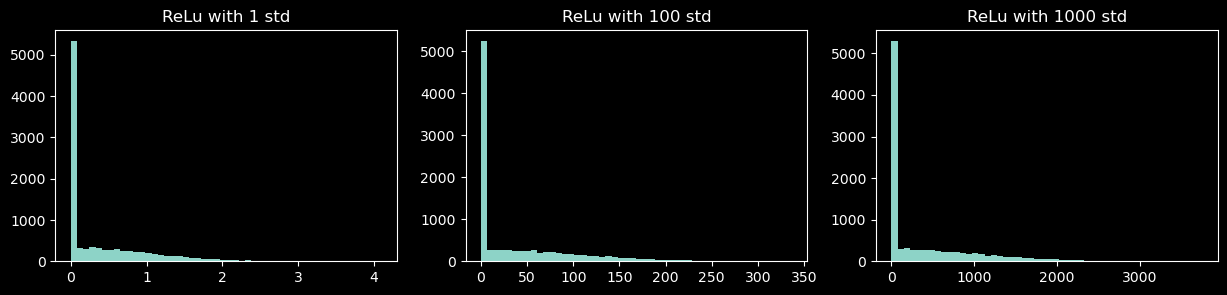

In [9]:
# activations of tanh and relu on a normal vector 
_, axs = plt.subplots(1, 3, figsize=(15, 3))
for idx, std in enumerate([1, 100, 1000]):
    x = torch.randn(10000) * std
    act_relu = torch.relu(x)
    axs[idx].hist(act_relu, 50) 
    axs[idx].set_title(f"ReLu with {std} Std")

tensor(0.0005) tensor(1.0035)
tensor(-0.0234) tensor(1.0081)


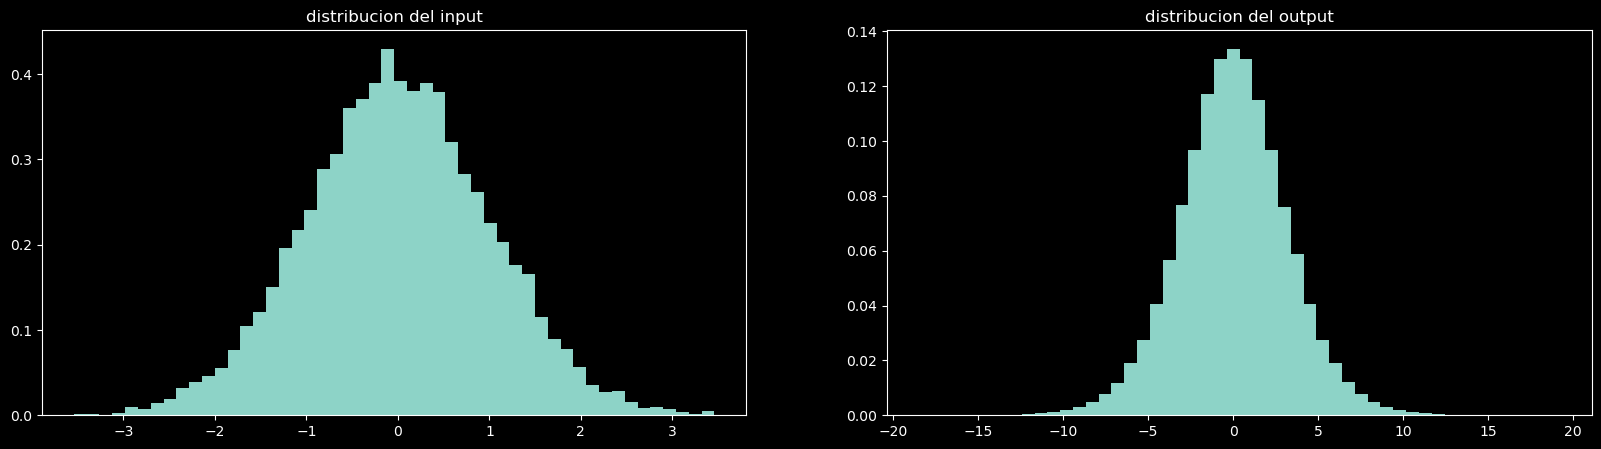

In [12]:
x = torch.randn(1000, 10)
w = torch.randn(10, 200)
y = x @ w

print(x.mean(), x.std())
print(w.mean(), w.std())

_, axs = plt.subplots(1, 2, figsize=(20, 5))

axs[0].hist(x.view(-1), 50, density=True)
axs[1].hist(y.view(-1), 50, density=True);
axs[0].set_title("distribucion del input")
axs[1].set_title("distribucion del output");

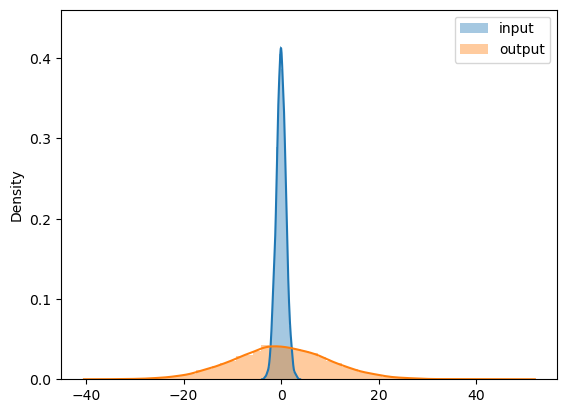

In [53]:
x = torch.randn(50, 100)
w = torch.randn(100, 200) 
y = x @ w

sns.distplot(x.view(-1), label="input")
sns.distplot(y.view(-1), label="output")
plt.legend();

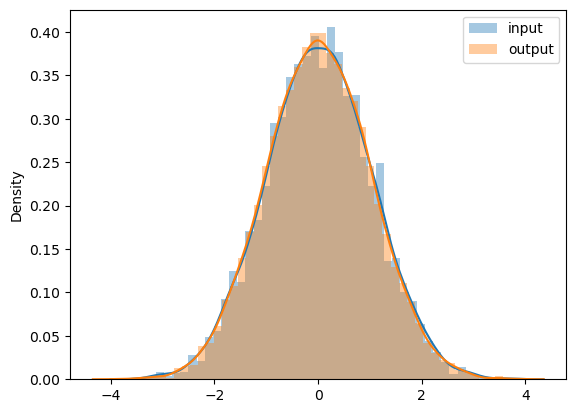

In [54]:
# Now using Xavier initialization
x = torch.randn(50, 100)
w = torch.randn(100, 200) * 1/100**0.5
y = x @ w

sns.distplot(x.view(-1), label="input")
sns.distplot(y.view(-1), label="output")
plt.legend();

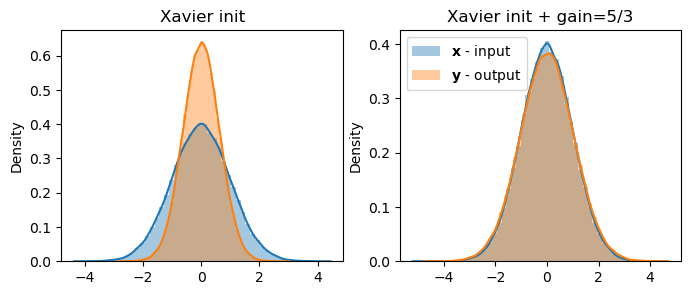

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

n = 100
x = torch.randn(1000, n)
w = torch.randn(n, 200) / n**0.5
y = torch.tanh(x) @ w

sns.distplot(x.reshape(-1), ax=ax[0], color="C0", label='$\mathbf{x}$ - input');
sns.distplot(y.reshape(-1), ax=ax[0], color="C1", label='$\mathbf{y}$ - output');
ax[0].set_title("Xavier init")

x = torch.randn(1000, n)
w = torch.randn(n, 200) * (5/3) / n**0.5
y = torch.tanh(x) @ w

sns.distplot(x.reshape(-1), ax=ax[1], color="C0", label='$\mathbf{x}$ - input');
sns.distplot(y.reshape(-1), ax=ax[1], color="C1", label='$\mathbf{y}$ - output');

ax[1].set_title("Xavier init + gain=5/3")
ax[1].legend();

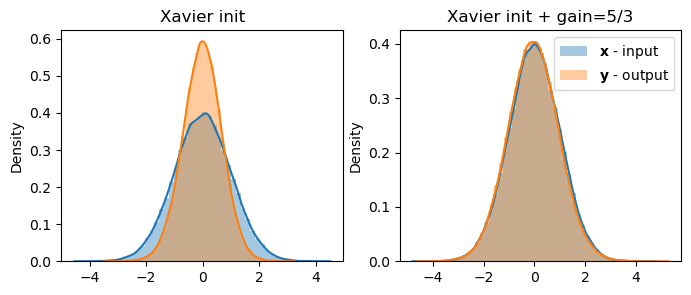

In [57]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

n = 100
x = torch.randn(1000, n)
w = torch.randn(n, 200) / n**0.5
y = torch.relu(x) @ w

sns.distplot(x.reshape(-1), ax=ax[0], color="C0", label='$\mathbf{x}$ - input');
sns.distplot(y.reshape(-1), ax=ax[0], color="C1", label='$\mathbf{y}$ - output');
ax[0].set_title("Xavier init")

x = torch.randn(1000, n)
w = torch.randn(n, 200) * (2**0.5) / n**0.5
y = torch.relu(x) @ w

sns.distplot(x.reshape(-1), ax=ax[1], color="C0", label='$\mathbf{x}$ - input');
sns.distplot(y.reshape(-1), ax=ax[1], color="C1", label='$\mathbf{y}$ - output');
<
ax[1].set_title("Xavier init + gain=5/3")
ax[1].legend();

## Softmax weights initialization

- It might be a good idea to scale the logits to have a smaller variance so that the softmax is more uniform, to do this I could scale down the weights of the last conv1x1 layer 


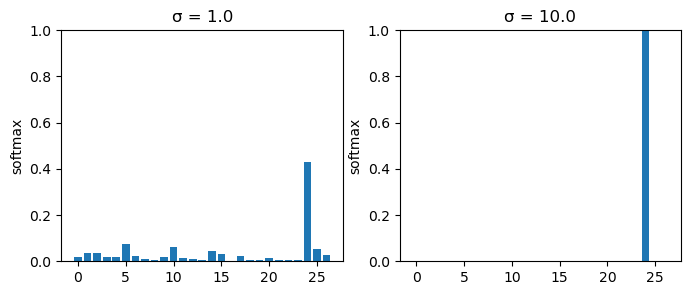

In [13]:
logits = torch.randn(size=(1, 27))

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
ax[0].bar(range(27), F.softmax(logits)[0]);
ax[1].bar(range(27), F.softmax(logits * 10)[0]);

ax[0].set_ylabel("softmax")
ax[0].set_ylim(0, 1)
ax[0].set_title("σ = 1.0")

ax[1].set_ylabel("softmax")
ax[1].set_ylim(0, 1)
ax[1].set_title("σ = 10.0");

## Examine of convolutional layers initialization

mean -0.0007668448379263282 variance 0.0018435029778629541
0.03333333333333333


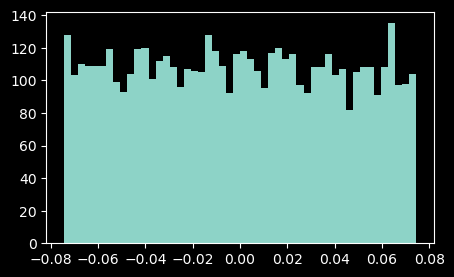

In [17]:
conv = torch.nn.Conv2d(20, 30, 3)
w = conv.weight
b = conv.bias

print("mean", w.mean().item(),"variance", w.var().item())

plt.figure(figsize=(5, 3))
plt.hist(w.detach().view(-1), 50);